In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
#import lightgbm as lgb
#from catboost import CatBoostRegressor

In [3]:
data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'selling_price'}>],
       [<Axes: title={'center': 'km_driven'}>, <Axes: >]], dtype=object)

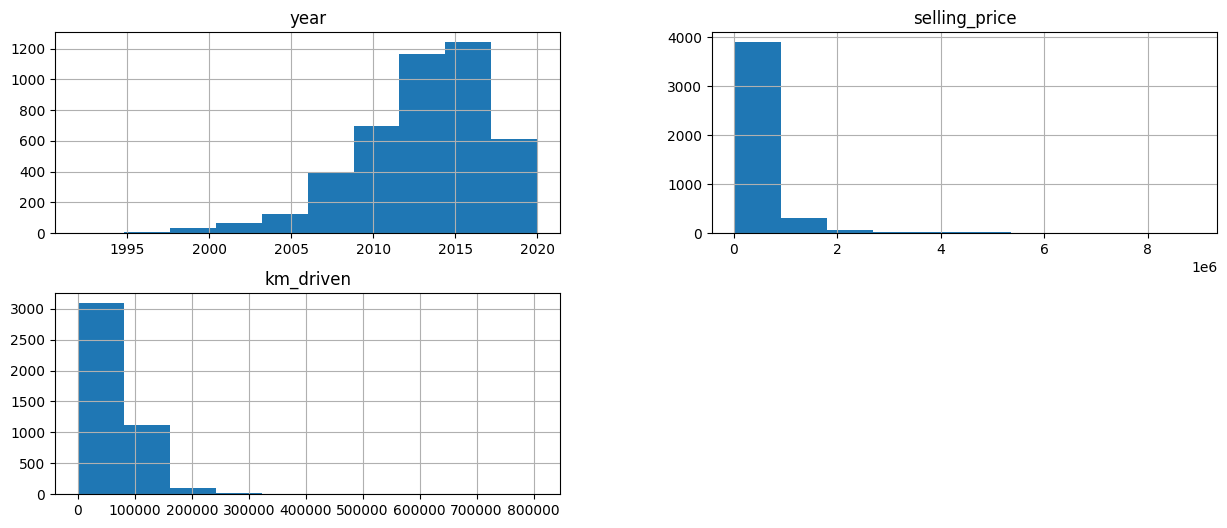

In [6]:
data.hist(figsize=(15,6))

In [7]:
data_new = data.drop(['name'], axis=1)

In [8]:
#Категориальные признаки
df_categorical_features = data_new.select_dtypes(include=[object])

df_categorical_features.columns

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [9]:
#Числовые признаки
df_numeric_features = data_new.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['year', 'selling_price', 'km_driven'], dtype='object')

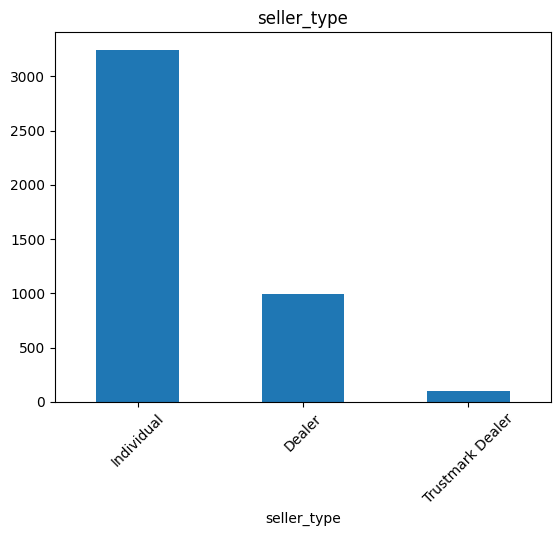

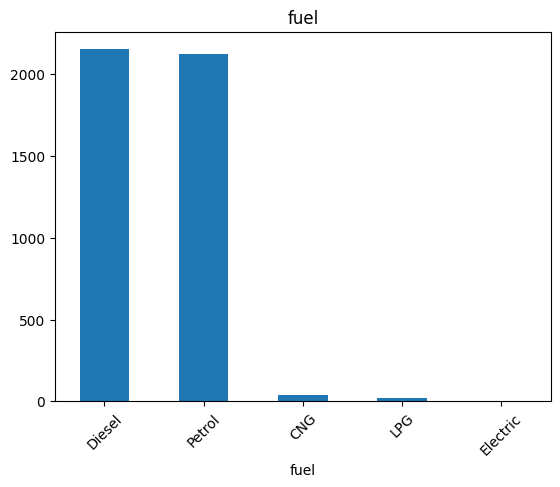

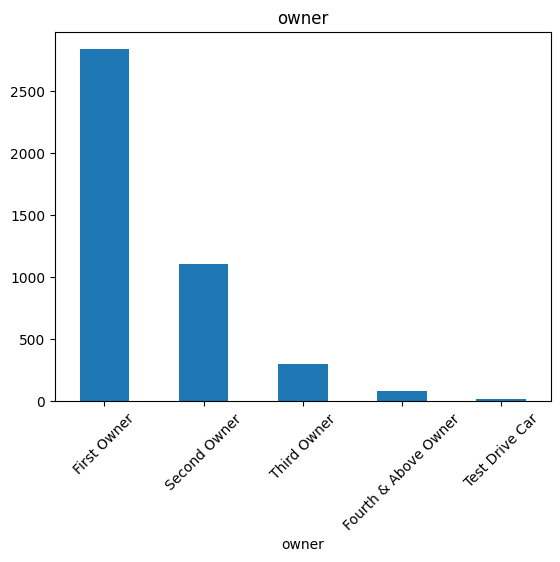

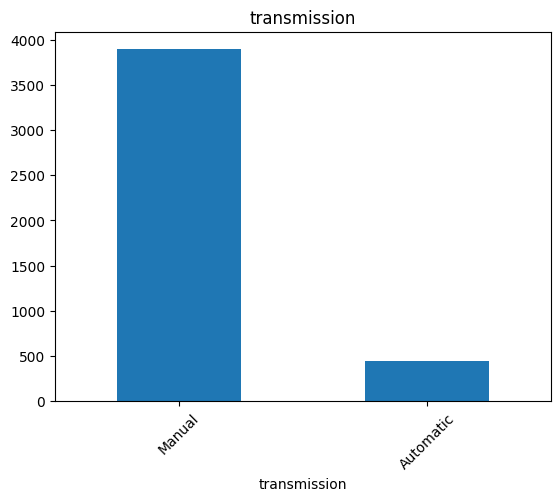

In [10]:
#Диаграмма распределенности типов продавцов
seller_type = ["seller_type"]
fig, ax = plt.subplots(1, len(seller_type))
for i, seller_type in enumerate(data_new[seller_type]):
    data_new[seller_type].value_counts().plot(kind="bar").set_title(seller_type)
plt.xticks(rotation=45)
#plt.yticks(np.arange(0, 45000, 3000.0))
plt.show()

#Диаграмма распределенности типов топлива
fuel = ["fuel"]
fig, ax = plt.subplots(1, len(fuel))
for i, fuel in enumerate(data_new[fuel]):
    data_new[fuel].value_counts().plot(kind="bar").set_title(fuel)
plt.xticks(rotation=45)
#plt.yticks(np.arange(0, 45000, 3000.0))
plt.show()

#Диаграмма распределенности типов владельцев
owner = ["owner"]
fig, ax = plt.subplots(1, len(owner))
for i, owner in enumerate(data_new[owner]):
    data_new[owner].value_counts().plot(kind="bar").set_title(owner)
plt.xticks(rotation=45)
#plt.yticks(np.arange(0, 45000, 3000.0))
plt.show()

#Диаграмма распределенности типов трансмиссии
transmission = ["transmission"]
fig, ax = plt.subplots(1, len(transmission))
for i, transmission in enumerate(data_new[transmission]):
    data_new[transmission].value_counts().plot(kind="bar").set_title(transmission)
plt.xticks(rotation=45)
#plt.yticks(np.arange(0, 45000, 3000.0))
plt.show()

In [11]:
from sklearn.compose import ColumnTransformer

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
target = data_new['selling_price']
features = data_new.drop(['selling_price'], axis=1)
features["fuel"] = features["fuel"].astype("category")
features["seller_type"] = features["seller_type"].astype("category")
features["transmission"] = features["transmission"].astype("category")
features["owner"] = features["owner"].astype("category")

In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          4340 non-null   int64   
 1   km_driven     4340 non-null   int64   
 2   fuel          4340 non-null   category
 3   seller_type   4340 non-null   category
 4   transmission  4340 non-null   category
 5   owner         4340 non-null   category
dtypes: category(4), int64(2)
memory usage: 85.6 KB


In [14]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=44)

In [15]:
simple_imputer = SimpleImputer(strategy='median')
#std_scaler = StandardScaler()
pipe_num = Pipeline([('imputer', simple_imputer)])

In [16]:
s_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#cat_proc = features[['fuel', 'seller_type', 'transmission', 'owner']].astype("category")
pipe_cat = Pipeline([('imputer', s_imputer), ('encoder', ohe_encoder)])

In [17]:
col_transformer = ColumnTransformer([('num_preproc', pipe_num, [x for x in features.columns if features[x].dtype!='category']),
                                     ('cat_preproc', pipe_cat, [x for x in features.columns if features[x].dtype=='category'])])

In [18]:
res = col_transformer.fit_transform(features_train)

C:\Users\aw347\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
res_df = pd.DataFrame(res, columns = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()])
res_df

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2018.0,10000.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2005.0,70000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2012.0,120000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2011.0,40000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2016.0,85000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,2009.0,68350.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3468,2013.0,1000.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3469,2017.0,10000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3470,2019.0,11000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [20]:
model_1 = XGBRegressor(tree_method='hist', enable_categorical=True, n_estimators=100)

final_pipe = Pipeline([('preproc', col_transformer),
                       ('model', model_1)])

In [21]:
final_pipe.fit(features_train, target_train)
preds = final_pipe.predict(features_test)

C:\Users\aw347\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
mse = mean_squared_error(target_test, preds)
rmse = (np.sqrt(mean_squared_error(target_test, preds)))
mae = mean_absolute_error(target_test, preds)
r2 = r2_score(target_test, preds)
print("Оценка тестового множества модели XGBoost:")
print('MSE: {:.2f}'.format(mse))
print('RMSE: {:.2f}'.format(rmse))
print('MAE: {:.2f}'.format(mae))
print('R2: {:.2f}'.format(r2))

Оценка тестового множества модели XGBoost:
MSE: 91852715252.49
RMSE: 303072.13
MAE: 159840.42
R2: 0.72


In [23]:
print(final_pipe.predict(features_test))

[ 289983.88    92198.125  421516.78   597729.8    371052.84   344560.5
  316599.06   412763.5    433960.84   263920.66   423639.4   1026951.44
  469780.03   359736.53   212351.2    109231.12   371947.47   182551.14
  104894.15   433960.84   727999.56    96114.76   526531.3    124202.37
  297445.3    447984.88   298024.38    91829.03   421516.78   562165.56
   94709.21    82377.72   457197.94   566675.25   228230.08   344667.03
 2771255.5    309224.75   880199.5    203165.6    491558.2    421089.8
  238950.97   648489.5    356079.78   361209.56   946319.75   506631.8
  287614.34   105296.52   175670.55    82377.72   754101.75   539241.7
  140157.98    75889.77   613845.3    686670.75   205098.92   289819.3
  763075.75   358129.28  1328277.4    332391.06   788703.2    160553.38
  629885.     596975.     365644.56   421516.78   176028.45   185806.61
  348520.7    182610.52   179874.06   494737.7    177262.84  1026951.44
  520526.7    290388.22   226767.4    407678.75   269929.78   492975.

In [24]:
target_test

2695     250000
1259      75000
2556     114999
3319     700000
2040     110000
         ...   
2368     650000
1558     500000
3565     500000
3284    1500000
2922     170000
Name: selling_price, Length: 868, dtype: int64

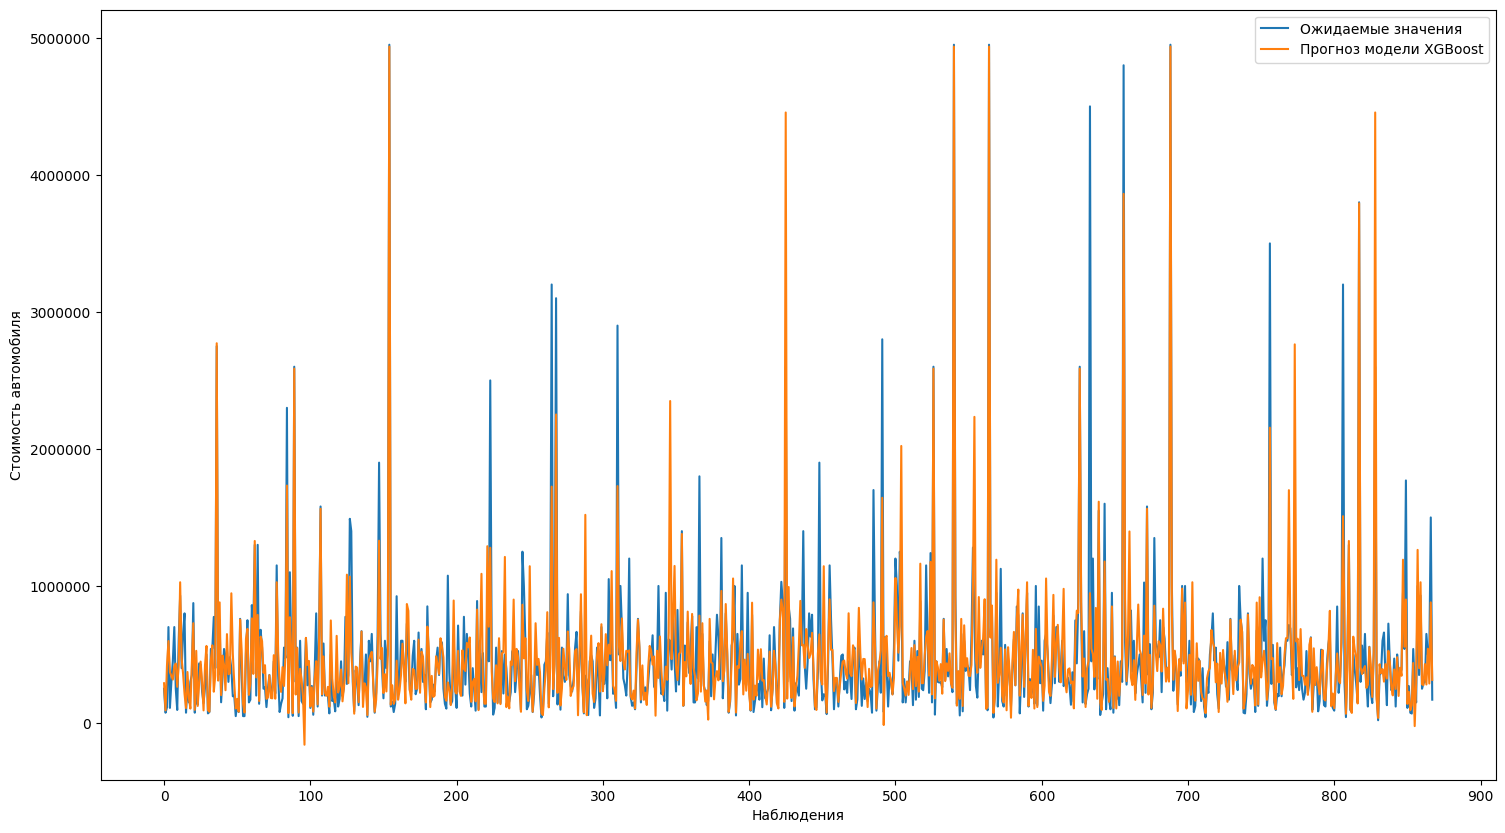

In [25]:
plt.figure(figsize=(18,10))
plt.plot(target_test.values, label = 'Ожидаемые значения')
plt.plot(final_pipe.predict(features_test), label = 'Прогноз модели XGBoost')
plt.xlabel('Наблюдения')
plt.ylabel('Стоимость автомобиля')
plt.ticklabel_format(style='plain')
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])
plt.legend()

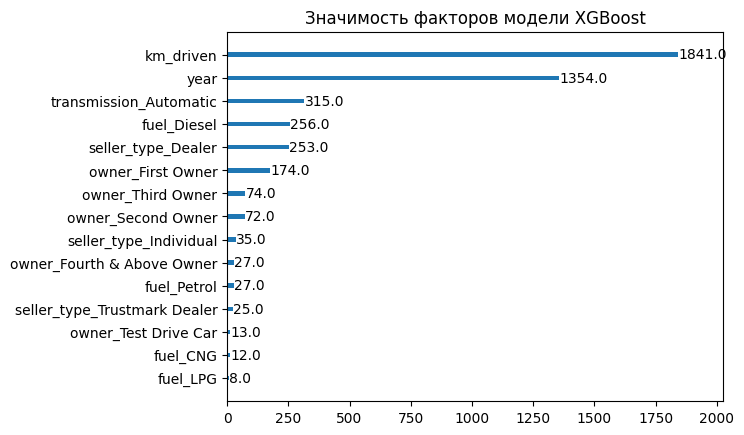

In [26]:
from xgboost import plot_importance
model_1.get_booster().feature_names = ["year", "km_driven", "fuel_CNG", "fuel_Diesel", "fuel_LPG", "fuel_Petrol", "seller_type_Dealer",	"seller_type_Individual",	"seller_type_Trustmark Dealer", "transmission_Automatic", "transmission_Manual", "owner_First Owner", "owner_Fourth & Above Owner", "owner_Second Owner", "owner_Test Drive Car", "owner_Third Owner"]
plot_importance(model_1, max_num_features=16, show_values=True)
plt.title('Значимость факторов модели XGBoost')
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.show()